In [18]:
from astropy.io import fits
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import twirl

%config IPCompleter.use_jedi = True


In [2]:
# opening the image and retrieving center and field of view
hdu = fits.open("fits_image/newimage_ff.fits")[0]

header = hdu.header 
data = hdu.data

# ra, dec in degrees
ra, dec = header["RA"], header["DEC"]
center = SkyCoord(ra, dec, unit=["deg", "deg"])
center = [center.ra.value, center.dec.value]

# image shape and pixel size in "
shape = data.shape
pixel = 180/2750 * u.arcsec
fov = np.max(shape)*pixel.to(u.deg).value

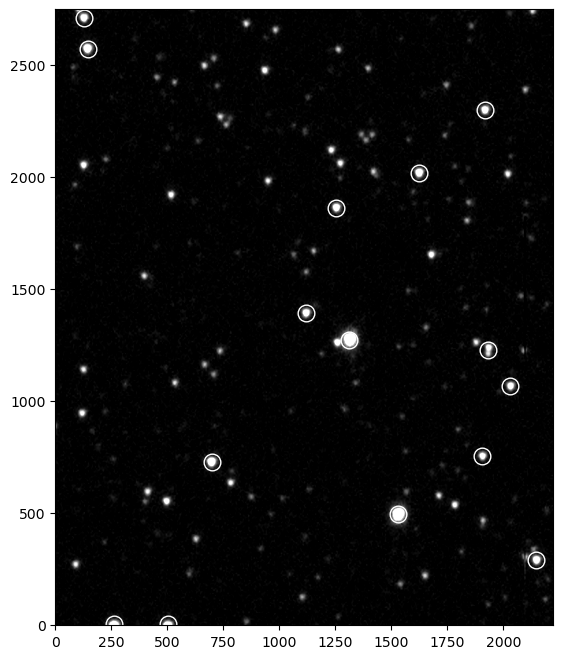

In [6]:
# Let's find some stars and display the image

stars = twirl.find_peaks(data)[0:15]

plt.figure(figsize=(8,8))
med = np.median(data)
plt.imshow(data, cmap="Greys_r", vmax=np.std(data)*5 + med, vmin=med, origin='lower')
plt.plot(*stars.T, "o", fillstyle="none", c="w", ms=12)

In [7]:
# we can now compute the WCS
gaias = twirl.gaia_radecs(center, fov, limit=len(stars))
wcs = twirl._compute_wcs(stars, gaias)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 150.17449069212844  -54.89683280574806  
CRPIX : 1017.8147763640887  1036.6101811836443  
CD1_1 CD1_2  : -9.703342771471361e-06  -1.502134584928413e-05  
CD2_1 CD2_2  : 2.7618108579615634e-05  -1.323011969753358e-05  
NAXIS : 1624  2020

In [21]:
import astropy.units as u
sc_crpix = SkyCoord(150.17449069212844, -54.89683280574806, unit="deg" )
print(sc_crpix.ra.hms)
wcs.all_world2pix([[150.17449069212844,-54.89683280574806 ]], 1)

hms_tuple(h=10.0, m=0.0, s=41.87776611083294)


array([[1017.81477636, 1036.61018118]])

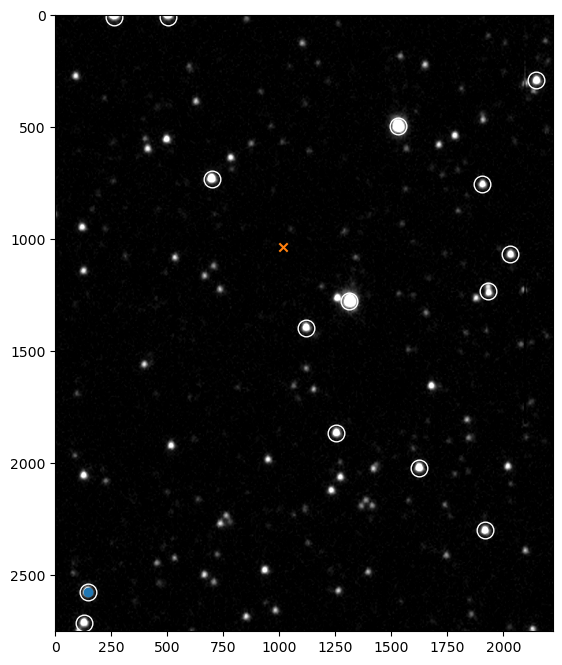

In [8]:
# Let's find some stars and display the image

star = stars[2]
gaia = gaias[2]


plt.figure(figsize=(8,8))
med = np.median(data)
plt.imshow(data, cmap="Greys_r", vmax=np.std(data)*5 + med, vmin=med)
plt.plot(*stars.T, "o", fillstyle="none", c="w", ms=12)
plt.scatter(x=star[0],y=star[1])
plt.scatter(x=1017,y=1036,marker="x")


In [210]:
l = SkyCoord("10:00:41.964 -54:47:05", unit=("hourangle","degree"))
r = SkyCoord("10:00:40.137 -54:47:05", unit=("hourangle", "degree"))

print(l.ra.degree,l.dec.dms)
print(r.ra.degree,r.dec.dms)
print(l.ra.degree - r.ra.degree)
l.separation(r)

150.17485 dms_tuple(d=-54.0, m=-47.0, s=-4.999999999997158)
150.16723749999997 dms_tuple(d=-54.0, m=-47.0, s=-4.999999999997158)
0.007612500000021782


<Angle 0.00438975 deg>

In [58]:
from astropy.wcs.utils import fit_wcs_from_points
sc_gaias = SkyCoord(gaias, unit='deg')
outwcs = fit_wcs_from_points(xy=(stars[:,0],stars[:,1]), world_coords=SkyCoord(gaias, unit="deg"),)
outwcs, wcs

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 150.17278103518245  -54.78545856745893  
 CRPIX : 1618.5198591597268  1229.5674833461956  
 CD1_1 CD1_2  : -7.231112186820368e-06  -8.81710282431964e-06  
 CD2_1 CD2_2  : 7.647185722265842e-07  -2.80889882239388e-07  
 NAXIS : 2061  2543,
 WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 150.1727822199544  -54.786785166756715  
 CRPIX : 1064.130253708876  1551.8647943544445  
 CD1_1 CD1_2  : -2.2604393593043868e-05  -4.803947449313428e-07  
 CD2_1 CD2_2  : -5.888890567504523e-07  1.8256924661642823e-05  
 NAXIS : 1992  2215)

In [83]:
gaias[2], stars[2],[sc_gaias[2]]

(array([150.1750472 , -54.77462041]),
 array([ 991.75400292, 2214.39343312]),
 [<SkyCoord (ICRS): (ra, dec) in deg
      (150.1750472, -54.77462041)>])

In [84]:
outwcs.all_world2pix([gaias[2]], 1), wcs.all_world2pix([gaias[2]], 0)

(array([[12468.36692699, -7816.89278036]]),
 array([[ 991.22377523, 2214.85357541]]))

In [40]:
(stars[:,0],stars[:,1])

(array([1532.24658687,  140.37845395,  991.75400292, 1096.91754745,
         663.59677203,  976.87917671, 1809.73642481, 1229.56350982,
        1991.6750838 ,  747.93079593, 1104.74359976, 1974.22445468,
         693.37189619, 2060.12425203, 1185.61382643]),
 array([1151.4474225 , 1594.82894749, 2214.39343312, 1184.96602046,
        1711.24895759, 1397.77356845, 2542.46779978, 1500.6248061 ,
         914.04791508, 1497.4875753 ,  932.11365062, 2062.19852013,
        2072.8934306 , 1217.66161727, 2078.83634566]))

In [42]:
len(stars[:,0])

15